In [12]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.style.use("dark_background")

In [13]:
df = pd.DataFrame({"coll":[1,2,3]})

<Axes: >

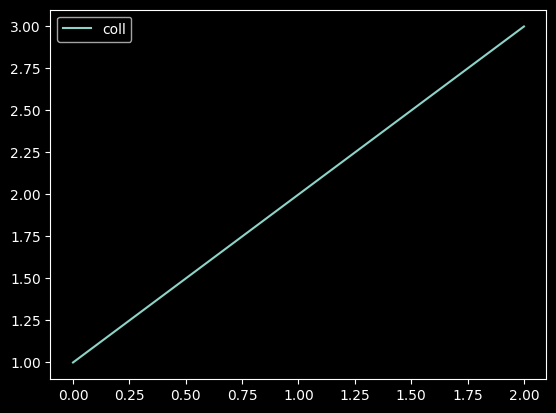

In [14]:
df.plot()

In [15]:
import seaborn as sns 

<Axes: ylabel='Count'>

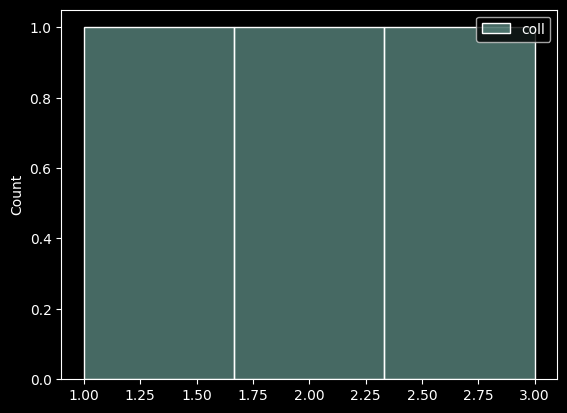

In [16]:
sns.histplot(df)

# CPT - центральная пределельная теорема

# https://www.codecamp.ru/blog/central-limit-theorem/

In [18]:
np.random.uniform()

0.3214639428131374

In [20]:
np.random.randint(1,7)

2

In [22]:
dice = pd.Series([1,2,3,4,5,6])

In [23]:
dice.mean()

3.5

In [25]:
np.random.randint(1,7, size=10)

array([2, 3, 2, 2, 4, 2, 3, 4, 3, 2])

In [32]:
dice.sample(10, replace=True) # генератор 

5    6
4    5
5    6
2    3
3    4
3    4
4    5
5    6
2    3
3    4
dtype: int64

In [36]:
dice.sample(1000000, replace=True).mean() # Чем больше выборка, тем больше точность среднего

3.49964

In [46]:
result = []
for n in range(1, 1000):
    result.append(dice.sample(n, replace=True).mean())

<Axes: >

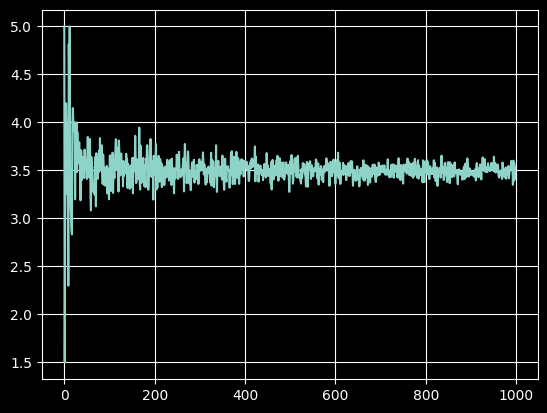

In [50]:
pd.Series(result).plot(grid=True)

In [52]:
result = [dice.sample(n, replace=True).mean() for n in range(1,1000)] # list comprehension

<Axes: >

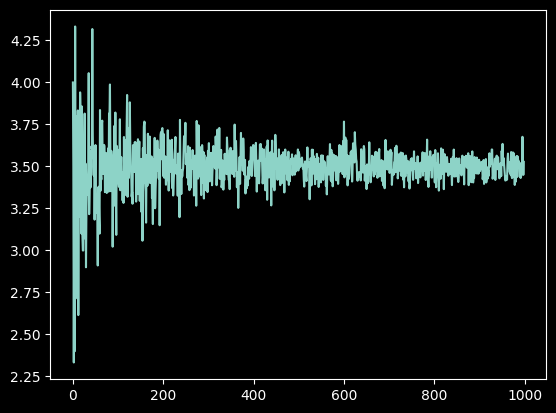

In [55]:
sns.lineplot(result)

In [60]:
t = dice.sample(1000, replace=True).to_frame().reset_index(drop=True)

In [61]:
t

,0
0,2
1,4
2,3
3,1
4,5
...,...
995,3
996,5
997,1
998,2


<Axes: xlabel='sample_size'>

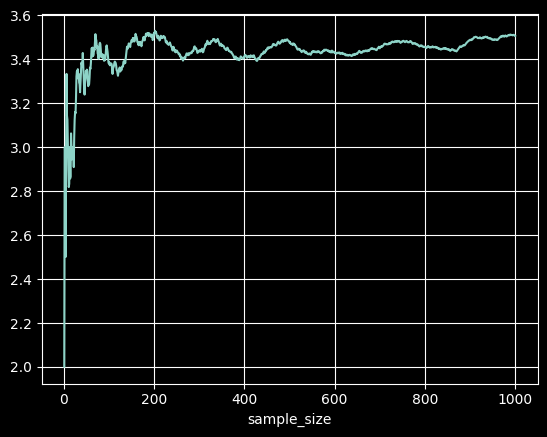

In [73]:
t["cum"] = t[0].cumsum()
t["sample_size"] = range(1, 1001)
t["mean"] = t["cum"] / t["sample_size"]
t.set_index("sample_size")["mean"].plot(grid=True)

<Axes: >

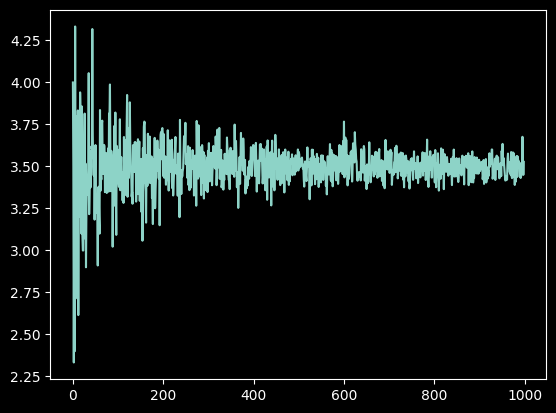

In [74]:
sns.lineplot(result)

# Нормальное распределение 

<Axes: xlabel='sample_size'>

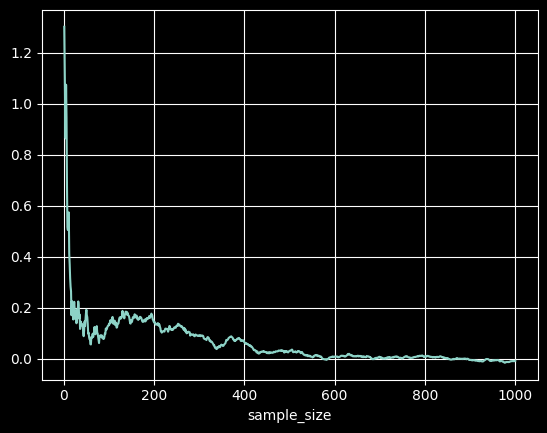

In [79]:
t = pd.DataFrame(np.random.normal(size=1000))
t["cum"] = t[0].cumsum()
t["sample_size"] = range(1, 1001)
t["mean"] = t["cum"] / t["sample_size"]
t.set_index("sample_size")["mean"].plot(grid=True)

# Равномерное распределение 

<Axes: xlabel='sample_size'>

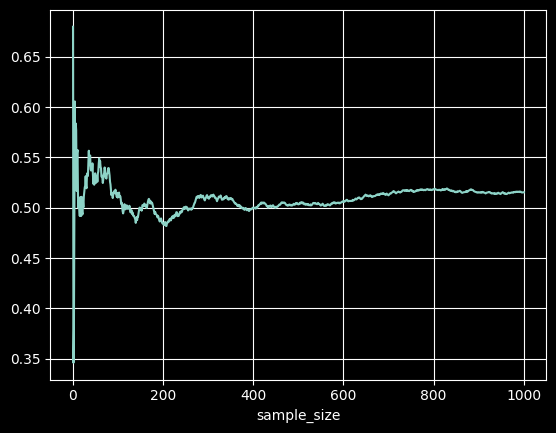

In [88]:
t = pd.DataFrame(np.random.uniform(size=1000))
t["cum"] = t[0].cumsum()
t["sample_size"] = range(1, 1001)
t["mean"] = t["cum"] / t["sample_size"]
t.set_index("sample_size")["mean"].plot(grid=True)

# Логнормальное 

https://docs.scipy.org/doc/scipy/reference/stats.html

<Axes: ylabel='Count'>

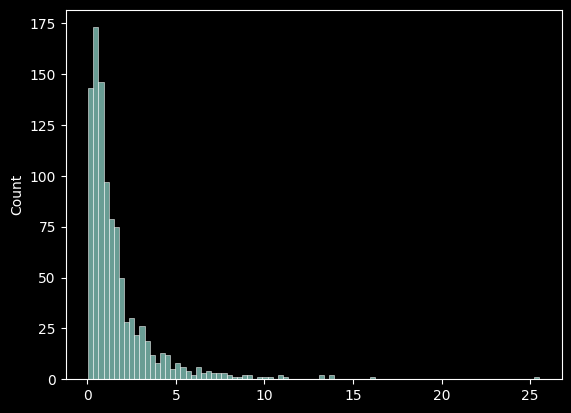

In [91]:
sns.histplot(np.random.lognormal(size=1000)) # Жирнохвостовое 

<Axes: ylabel='Count'>

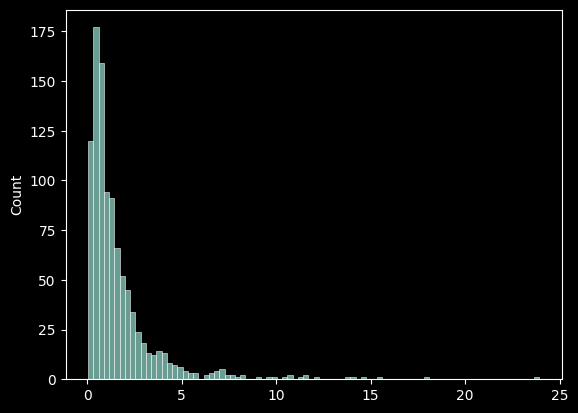

In [116]:
from scipy.stats import lognorm
s = 3
mean, var, skew, kurt = lognorm.stats(s, moments="mvsk")
sns.histplot(r)

In [112]:
mean

3.0802168489180315

In [113]:
var

80.5293954641633

<Axes: xlabel='sample_size'>

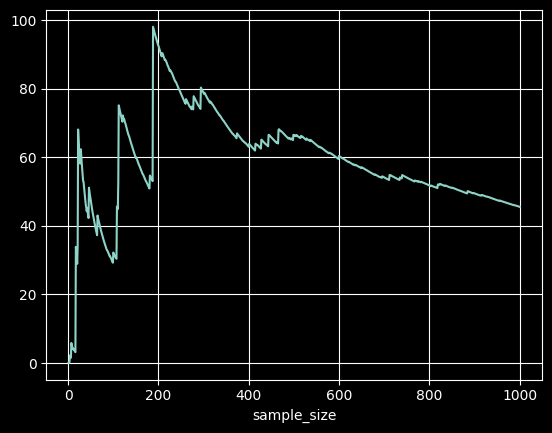

In [115]:
t = pd.DataFrame(lognorm.rvs(s, size=1000))
t["cum"] = t[0].cumsum()
t["sample_size"] = range(1, 1001)
t["mean"] = t["cum"] / t["sample_size"]
t.set_index("sample_size")["mean"].plot(grid=True)

# Центральная предельная теорема 

In [117]:
dice

0    1
1    2
2    3
3    4
4    5
5    6
dtype: int64

<Axes: ylabel='Count'>

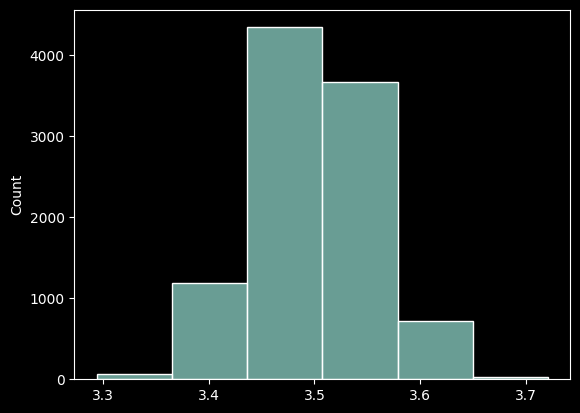

In [132]:
sns.histplot([dice.sample(1000, replace=True).mean() for _ in range(10000)], bins=6)

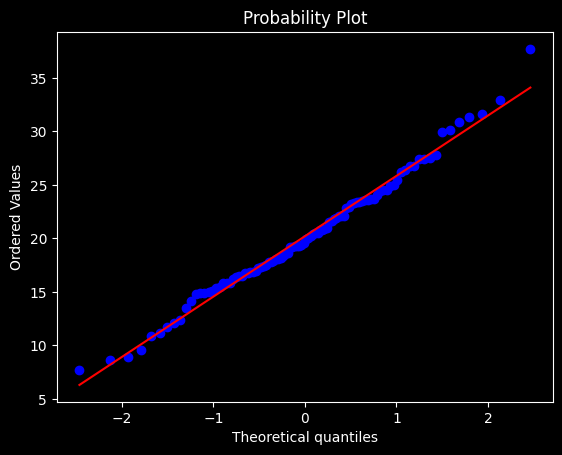

In [133]:
import numpy as np 
import pylab 
import scipy.stats as stats

measuremenent = np.random.normal(loc = 20, scale = 5, size = 100)
stats.probplot(measuremenent, dist="norm", plot = pylab)
pylab.show()

In [138]:
def d():
    return dice.sample(1, replace=True).values[0]

In [139]:
d()

5

<Axes: ylabel='Count'>

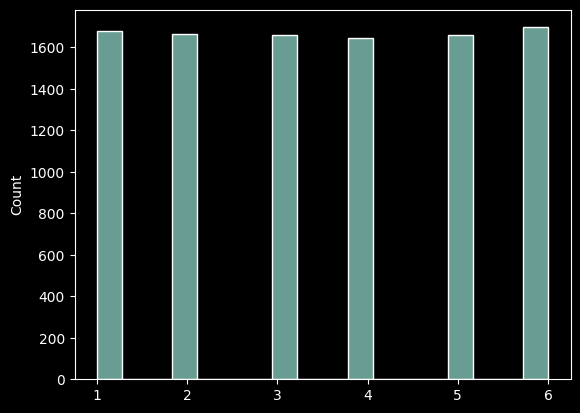

In [144]:
sns.histplot([d() for _ in range(10000)])

<Axes: ylabel='Count'>

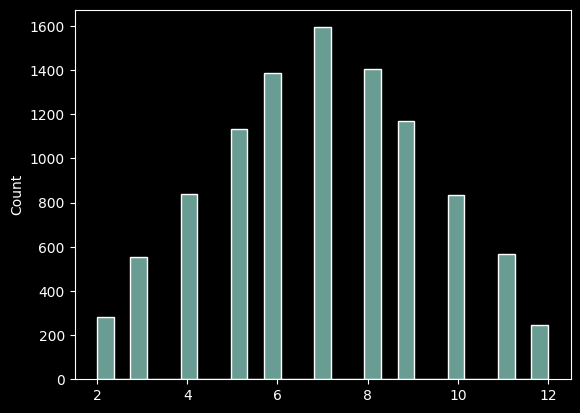

In [145]:
sns.histplot([d() + d() for _ in range(10000)])

In [146]:
# Закон больших чисел - с увеличением sample, тем стабильнее будет наш ответ 

In [147]:
# Размер выборки понижает ошибку

In [148]:
# Центральная предельная теорема

<Axes: ylabel='Count'>

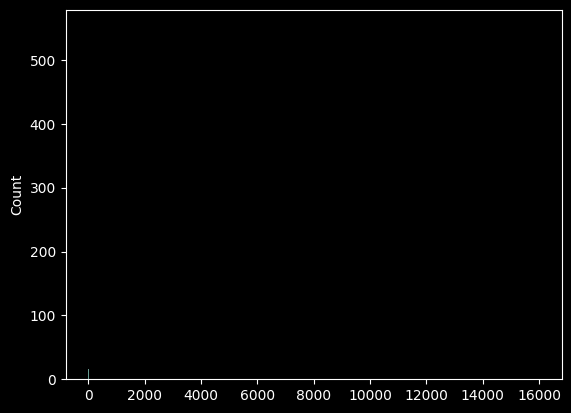

In [150]:
s = 3 
r = lognorm.rvs(s, size=1000)
sns.histplot(r)

<Axes: ylabel='Count'>

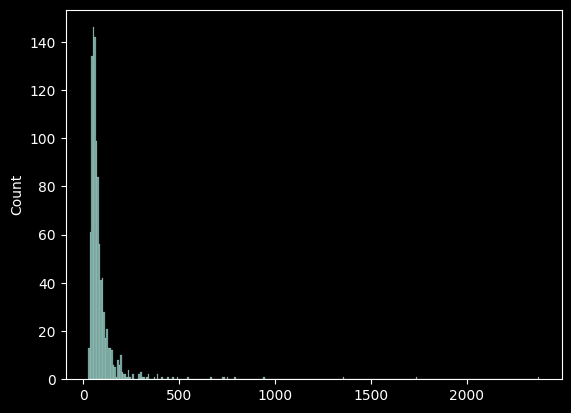

In [151]:
sns.histplot([lognorm.rvs(s, size=1000).mean() for _ in range(1000)])